In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [ ]:
# Load the dataset from CSV file
projectPath_save = projectPath_save = "./save/"
projectPath = "./data/"
file_path = projectPath+ "timeVideo3.csv"

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df

,TIME,behaviour
0,00:00:00,NIP_IN
1,00:00:15,NIP_IN
2,00:00:30,NIP_IN
3,00:00:45,NIP_IN
4,00:01:00,NIP_IN
...,...,...
799,03:19:45,NIP_OUT
800,03:20:00,AM
801,03:20:15,AM
802,03:20:30,AM


Remove sequences of same behaviour

In [ ]:
df['behaviour_next'] = df['behaviour'].shift(-1)
df = df[df['behaviour'] != df['behaviour_next']]
df = df.drop('behaviour_next', axis=1)

In [ ]:
df

,TIME,behaviour
6,00:01:30,NIP_IN
7,00:01:45,NaN
8,00:02:00,NaN
9,00:02:15,NaN
10,00:02:30,NaN
...,...,...
790,03:17:30,FAN
791,03:17:45,NaN
796,03:19:00,MAN
799,03:19:45,NIP_OUT


In [ ]:
#Remove NaN
df = df[df['behaviour'].notna()]
df

,TIME,behaviour
6,00:01:30,NIP_IN
41,00:10:15,MAN
43,00:10:45,SPIT
71,00:17:45,NIP_OUT
86,00:21:30,AM
...,...,...
768,03:12:00,ROLL
790,03:17:30,FAN
796,03:19:00,MAN
799,03:19:45,NIP_OUT


In [ ]:
# Calculate transitions
transitions = list(zip(df['behaviour'], df['behaviour'].shift(-1)))
transitions = [t for t in transitions if pd.notnull(t[1])]

In [ ]:
transitions

[('NIP_IN', 'MAN'),
 ('MAN', 'SPIT'),
 ('SPIT', 'NIP_OUT'),
 ('NIP_OUT', 'AM'),
 ('AM', 'NIP_IN'),
 ('NIP_IN', 'MAN'),
 ('MAN', 'NIP_CORE'),
 ('NIP_CORE', 'MAN'),
 ('MAN', 'NIP_CORE'),
 ('NIP_CORE', 'MAN'),
 ('MAN', 'NIP_IN'),
 ('NIP_IN', 'MAN'),
 ('MAN', 'FS'),
 ('FS', 'MAN'),
 ('MAN', 'NIP_CORE'),
 ('NIP_CORE', 'ROLL'),
 ('ROLL', 'LF'),
 ('LF', 'BK_SW'),
 ('BK_SW', 'LF'),
 ('LF', 'BEND'),
 ('BEND', 'ROLL'),
 ('ROLL', 'LF'),
 ('LF', 'BEND'),
 ('BEND', 'DAN_CIRC'),
 ('DAN_CIRC', 'BEND'),
 ('BEND', 'GB'),
 ('GB', 'SPA'),
 ('SPA', 'BEND'),
 ('BEND', 'SPA'),
 ('SPA', 'BEND'),
 ('BEND', 'DAN_CIRC'),
 ('DAN_CIRC', 'BEND'),
 ('BEND', 'LF'),
 ('LF', 'ROLL'),
 ('ROLL', 'BEND'),
 ('BEND', 'DAN_CIRC'),
 ('DAN_CIRC', 'BEND'),
 ('BEND', 'LF'),
 ('LF', 'BEND'),
 ('BEND', 'GB'),
 ('GB', 'DAN_CIRC'),
 ('DAN_CIRC', 'BEND'),
 ('BEND', 'GB'),
 ('GB', 'CHASE_FLEE'),
 ('CHASE_FLEE', 'CHASE_FLEE'),
 ('CHASE_FLEE', 'BN'),
 ('BN', 'NIP_CORE'),
 ('NIP_CORE', 'BEND_OPP'),
 ('BEND_OPP', 'BEND_OPP'),
 ('BEND_OPP

In [ ]:
# Find all unique behaviours
unique_behaviors = df['behaviour'].unique()
print(unique_behaviors)
print(len(unique_behaviors))

['NIP_IN' 'MAN' 'SPIT' 'NIP_OUT' 'AM' 'NIP_CORE' 'FS' 'ROLL' 'LF' 'BK_SW'
 'BEND' 'DAN_CIRC' 'GB' 'SPA' 'CHASE_FLEE' 'BN' 'BEND_OPP' 'FAN' 'INSF']
19


In [ ]:
# Initialize transition matrix
transition_matrix = pd.DataFrame(0, index=unique_behaviors, columns=unique_behaviors)

In [ ]:
# Fill transition matrix
for (current_behavior, next_behavior) in transitions:
    transition_matrix.loc[current_behavior, next_behavior] += 1



In [ ]:
transition_matrix

,NIP_IN,MAN,SPIT,NIP_OUT,AM,NIP_CORE,FS,ROLL,LF,BK_SW,BEND,DAN_CIRC,GB,SPA,CHASE_FLEE,BN,BEND_OPP,FAN,INSF
NIP_IN,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
MAN,1,0,1,1,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0
SPIT,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
NIP_OUT,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AM,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
NIP_CORE,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,2
FS,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ROLL,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,2,1,0
LF,0,0,0,0,0,0,0,2,0,1,3,0,0,0,0,0,0,0,0
BK_SW,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Normalize matrix to get probabilities
transition_matrix_normalized = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

In [ ]:
transition_matrix_normalized

,NIP_IN,MAN,SPIT,NIP_OUT,AM,NIP_CORE,FS,ROLL,LF,BK_SW,BEND,DAN_CIRC,GB,SPA,CHASE_FLEE,BN,BEND_OPP,FAN,INSF
NIP_IN,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
MAN,0.142857,0.000000,0.142857,0.142857,0.0,0.428571,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
SPIT,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
NIP_OUT,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
AM,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
NIP_CORE,0.000000,0.285714,0.000000,0.000000,0.0,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.142857,0.142857,0.285714
FS,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
ROLL,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.166667,0.000000
LF,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.333333,0.000000,0.166667,0.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
BK_SW,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


**Visualize transition matrix for all behaviours**

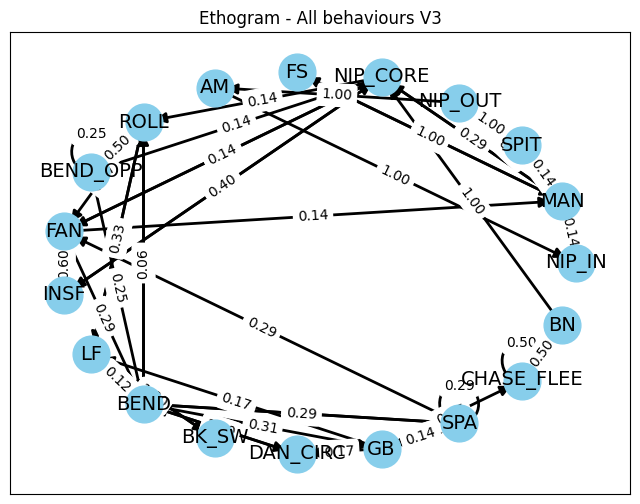

In [ ]:
# Create graph
G = nx.DiGraph()

# Add nodes and arches with weights
for i in range(len(transition_matrix_normalized)):
    for j in range(len(transition_matrix_normalized.columns)):
        if transition_matrix_normalized.iloc[i, j] > 0:
            G.add_edge(transition_matrix_normalized.index[i],
                       transition_matrix_normalized.columns[j],
                       weight=transition_matrix_normalized.iloc[i, j])

# Define layout
pos = nx.circular_layout(G)
plt.figure(figsize=(8, 6))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')

# Draw arches
nx.draw_networkx_edges(G, pos, width=2, arrowstyle='-|>', arrowsize=15)

# Draw labels at nodes
nx.draw_networkx_labels(G, pos, font_size=14, font_family='sans-serif')

# Draw labels at arches
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Ethogram - All behaviours V3')
plt.show()


**select behaviours of interest**

In [ ]:
# Define the behaviors of interest for ethogram and Markov chain
behaviors_of_interest = ['BEND', 'DAN_CIRC', 'GB', 'SPA']

**Filter normalized matrix**

In [ ]:
# Filter normalized matrix for behaviour of interest
filtered_transition_matrix_normalizedBI = transition_matrix_normalized.loc[behaviors_of_interest, behaviors_of_interest]

print(filtered_transition_matrix_normalizedBI)

              BEND  DAN_CIRC        GB       SPA
BEND      0.000000  0.375000  0.312500  0.125000
DAN_CIRC  1.000000  0.000000  0.000000  0.000000
GB        0.000000  0.166667  0.000000  0.500000
SPA       0.285714  0.000000  0.142857  0.285714


**Slightly different visualizations to choose from**

<ipython-input-19-aafe6cd4e796>:31: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],


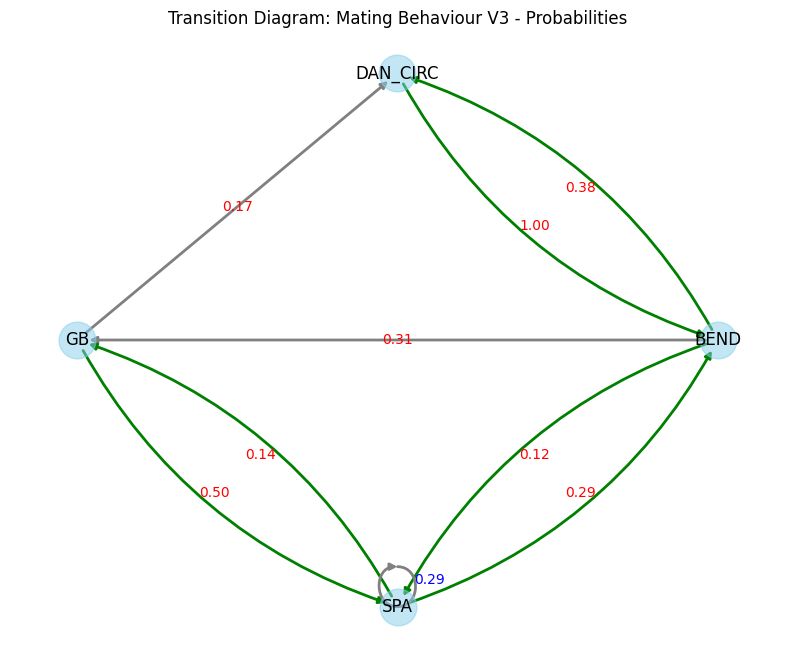

In [ ]:
# Graph
G_filtered = nx.DiGraph()


for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # add arch with weight (transition probability)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Put circular nodes
pos = nx.circular_layout(G_filtered)

plt.figure(figsize=(10, 8))


nx.draw_networkx_nodes(G_filtered, pos, node_size=700, node_color='skyblue', alpha=0.5)


for u, v, d in G_filtered.edges(data=True):
    if G_filtered.has_edge(v, u) and u != v:

        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='green',
                               connectionstyle='arc3,rad=0.2')

        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],
                               width=2, arrows=False, edge_color='white',
                               connectionstyle='arc3,rad=-0.2')
    else:

        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='gray')


nx.draw_networkx_labels(G_filtered, pos, font_size=12, font_color='black', font_family='sans-serif')


edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G_filtered.edges(data=True)}


for (u, v), label in edge_labels.items():
    if u == v:
        x, y = pos[u]
        plt.text(x + 0.1, y + 0.1, label, color='blue', ha='center', va='center')
    else:
        if G_filtered.has_edge(v, u) and u != v:

            x, y = (pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2
            dx, dy = pos[v][0] - pos[u][0], pos[v][1] - pos[u][1]
            angle = np.arctan2(dy, dx)
            angle = np.degrees(angle)
            plt.text(x + 0.1 * np.sin(np.radians(angle)), y - 0.1 * np.cos(np.radians(angle)),
                     label, color='red', ha='center', va='center')
        else:

            plt.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2,
                     label, color='red', ha='center', va='center')


plt.title('Transition Diagram: Mating Behaviour V3 - Probabilities')
plt.axis('off')

#save
#plt.savefig(projectPath_save + '01MatingBehaviourV3.png')
#plt.savefig(projectPath_save + '01MatingBehaviourV3.pdf')
#plt.savefig(projectPath_save + '01MatingBehaviourV3.svg')

plt.show()  # Mostra il grafo


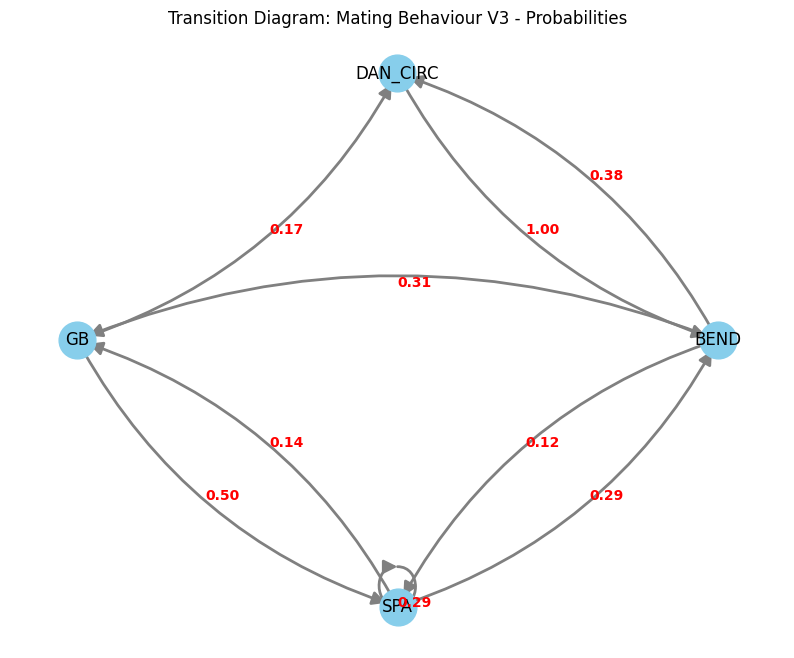

In [ ]:
# Graph
G_filtered = nx.DiGraph()


for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # add arch with weight (transition probability)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Position circular nodes
pos_filtered = nx.circular_layout(G_filtered)


plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Draw curving arches and arrow points
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modify position to draw curving arches
    rad = 0.2 if u != v else 0.0  # rad=0.2 per curve, rad=0 per self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Add labels to nodes
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Add labels to arches with probability
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    # Calculate mean position between strating and ending nodes
    x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
    y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2
    # Apply shift to avoid overlapping
    offset = 0.1
    x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
    y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Title
plt.title('Transition Diagram: Mating Behaviour V3 - Probabilities')
plt.axis('off')  # Disactivate axis

#save
#plt.savefig(projectPath_save + '02MatingBehaviourV3.png')
#plt.savefig(projectPath_save + '02MatingBehaviourV3.pdf')
#plt.savefig(projectPath_save + '02MatingBehaviourV3.svg')

plt.show()

<ipython-input-21-4b36d5f3d223>:31: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],


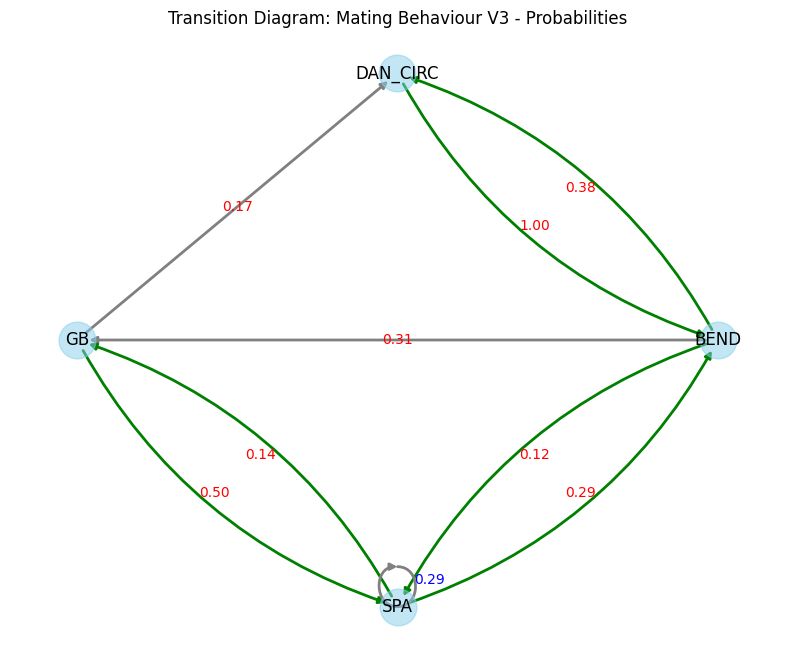

In [ ]:
# Create graph
G_filtered = nx.DiGraph()


for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:

            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)


pos = nx.circular_layout(G_filtered)

plt.figure(figsize=(10, 8))


nx.draw_networkx_nodes(G_filtered, pos, node_size=700, node_color='skyblue', alpha=0.5)


for u, v, d in G_filtered.edges(data=True):
    if G_filtered.has_edge(v, u) and u != v:

        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='green',
                               connectionstyle='arc3,rad=0.2')  # Arco curvo

        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],
                               width=2, arrows=False, edge_color='white',    #toglie la linea in mezzo
                               connectionstyle='arc3,rad=-0.2')  # Arco curvo opposto senza punta di freccia
    else:

        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='gray')


nx.draw_networkx_labels(G_filtered, pos, font_size=12, font_color='black', font_family='sans-serif')

# Label arches
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G_filtered.edges(data=True)}

# Label arches
for (u, v), label in edge_labels.items():
    if u == v:  # Check for self-loop
        x, y = pos[u]
        plt.text(x + 0.1, y + 0.1, label, color='blue', ha='center', va='center')  # Regolazione posizione etichetta
    else:
        if G_filtered.has_edge(v, u) and u != v:  # Check for two-direction arches
            # label for bending arch u -> v
            x, y = (pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2
            dx, dy = pos[v][0] - pos[u][0], pos[v][1] - pos[u][1]
            angle = np.arctan2(dy, dx)
            angle = np.degrees(angle)
            plt.text(x + 0.1 * np.sin(np.radians(angle)), y - 0.1 * np.cos(np.radians(angle)),
                     label, color='red', ha='center', va='center')
        else:
            # label for one-direction arch
            plt.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2,
                     label, color='red', ha='center', va='center')


plt.title('Transition Diagram: Mating Behaviour V3 - Probabilities')
plt.axis('off')  # Deactivate axis

#save
#plt.savefig(projectPath_save + '03MatingBehaviourV3.png')
#plt.savefig(projectPath_save + '03MatingBehaviourV3.pdf')
#plt.savefig(projectPath_save + '03MatingBehaviourV3.svg')

plt.show()  # Mostra il grafo


**Grouping behaviours for categories**

**COURTSHIP**

In [ ]:
#removing ['H_DOWN', 'H_UP', 'MAF', 'UP'] not in index"
Courtship_all = ['BEND', 'DAN_CIRC', 'ROLL', 'GB', 'LF', 'BK_SW', 'BEND_OPP', 'INSF']


In [ ]:
# Filter matrix on behaviours of interest
filtered_transition_matrix_normalizedBI = transition_matrix_normalized.loc[Courtship_all, Courtship_all]

print(filtered_transition_matrix_normalizedBI)


              BEND  DAN_CIRC      ROLL      GB        LF     BK_SW  BEND_OPP  \
BEND      0.000000  0.375000  0.062500  0.3125  0.125000  0.000000  0.000000   
DAN_CIRC  1.000000  0.000000  0.000000  0.0000  0.000000  0.000000  0.000000   
ROLL      0.166667  0.000000  0.000000  0.0000  0.333333  0.000000  0.333333   
GB        0.000000  0.166667  0.000000  0.0000  0.166667  0.000000  0.000000   
LF        0.500000  0.000000  0.333333  0.0000  0.000000  0.166667  0.000000   
BK_SW     0.000000  0.000000  0.000000  0.0000  1.000000  0.000000  0.000000   
BEND_OPP  0.250000  0.000000  0.500000  0.0000  0.000000  0.000000  0.250000   
INSF      0.000000  0.000000  0.000000  0.0000  0.000000  0.000000  0.000000   

          INSF  
BEND       0.0  
DAN_CIRC   0.0  
ROLL       0.0  
GB         0.0  
LF         0.0  
BK_SW      0.0  
BEND_OPP   0.0  
INSF       0.0  


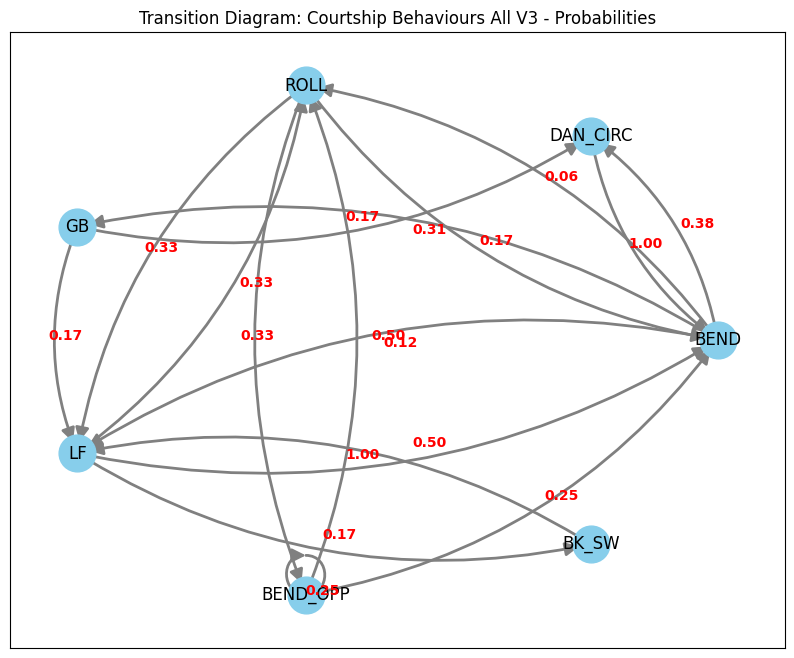

In [ ]:
# Graph
G_filtered = nx.DiGraph()

# Aggiunta degli archi al grafo con le probabilità come peso
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
pos_filtered = nx.circular_layout(G_filtered)

# Creazione del grafico
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Disegna archi con stile a curve e frecce monodirezionali
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modifica la posizione per disegnare archi curvi
    rad = 0.2 if u != v else 0.0  # rad=0.2 per curve, rad=0 per self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Aggiunta delle etichette ai nodi
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Aggiunta delle etichette agli archi con la probabilità di transizione vicino agli archi
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    # Calcola la posizione media tra i nodi di partenza e di arrivo
    x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
    y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2
    # Applica un piccolo spostamento per evitare sovrapposizioni con le frecce
    offset = 0.1
    x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
    y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Titolo del grafico
plt.title('Transition Diagram: Courtship Behaviours All V3 - Probabilities')

#save
#plt.savefig(projectPath_save + '01Courtship_allV3.png')
#plt.savefig(projectPath_save + '01Courtship_allV3.pdf')
#plt.savefig(projectPath_save + '01Courtship_allV3.svg')

# Mostra il grafico
plt.show()


<ipython-input-25-e194cbed4e54>:31: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],


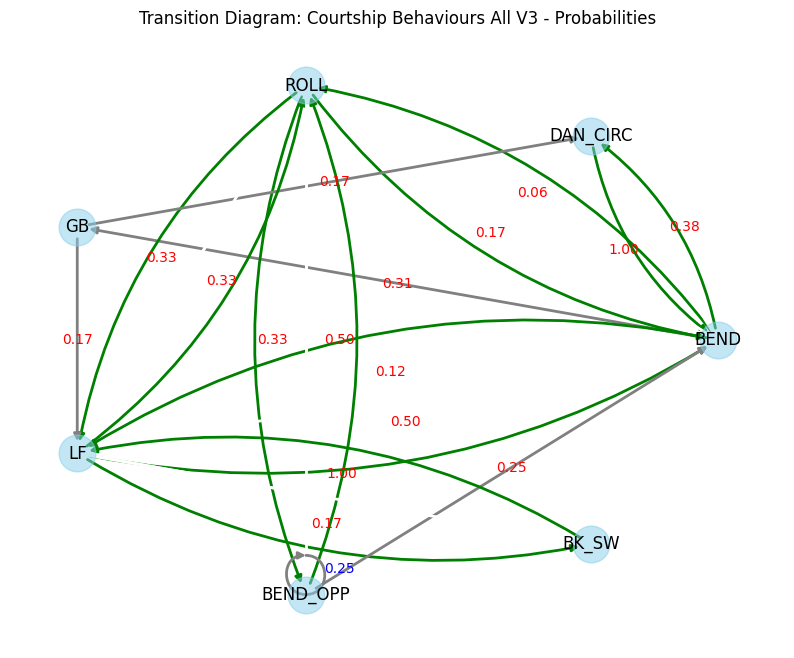

In [ ]:
import networkx as nx

# Creazione del grafo diretto
G_filtered = nx.DiGraph()

# Aggiunta di nodi e archi al grafo
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
# Definizione del layout del grafo
pos = nx.circular_layout(G_filtered)

plt.figure(figsize=(10, 8))

# Disegno dei nodi
nx.draw_networkx_nodes(G_filtered, pos, node_size=700, node_color='skyblue', alpha=0.5)

# Disegno degli archi con stili personalizzati per evitare sovrapposizioni
for u, v, d in G_filtered.edges(data=True):
    if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale (escludendo autoanelli)
        # Disegno dell'arco u -> v
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='green',
                               connectionstyle='arc3,rad=0.2')  # Arco curvo
        # Disegno dell'arco v -> u senza punta di freccia
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],
                               width=2, arrows=False, edge_color='white',    #toglie la linea in mezzo
                               connectionstyle='arc3,rad=-0.2')  # Arco curvo opposto senza punta di freccia
    else:
        # Disegno dell'arco unidirezionale
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='gray')

# Disegno delle etichette (nodi e archi)
nx.draw_networkx_labels(G_filtered, pos, font_size=12, font_color='black', font_family='sans-serif')

# Creazione delle etichette degli archi
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G_filtered.edges(data=True)}

# Personalizzazione delle etichette degli archi
for (u, v), label in edge_labels.items():
    if u == v:  # Controllo per autoanello
        x, y = pos[u]
        plt.text(x + 0.1, y + 0.1, label, color='blue', ha='center', va='center')  # Regolazione posizione etichetta
    else:
        if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale
            # Etichetta per l'arco curvo u -> v
            x, y = (pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2
            dx, dy = pos[v][0] - pos[u][0], pos[v][1] - pos[u][1]
            angle = np.arctan2(dy, dx)
            angle = np.degrees(angle)
            plt.text(x + 0.1 * np.sin(np.radians(angle)), y - 0.1 * np.cos(np.radians(angle)),
                     label, color='red', ha='center', va='center')
        else:
            # Etichetta per l'arco unidirezionale
            plt.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2,
                     label, color='red', ha='center', va='center')

# Titolo del grafico
plt.title('Transition Diagram: Courtship Behaviours All V3 - Probabilities')
plt.axis('off')  # Disattiva gli assi
#save
#plt.savefig(projectPath_save + '02Courtship_allV3.png')
#plt.savefig(projectPath_save + '02Courtship_allV3.pdf')
#plt.savefig(projectPath_save + '02Courtship_allV3.svg')

# Mostra il grafico
plt.show()


In [ ]:
Courtship_few = ['ROLL', 'INSF', 'NIP_CORE', 'BEND', 'LF']

In [ ]:
# Filtra la matrice di transizione per i comportamenti di interesse
filtered_transition_matrix_normalizedBI = transition_matrix_normalized.loc[Courtship_few, Courtship_few]

# Visualizza la matrice filtrata
print(filtered_transition_matrix_normalizedBI)


              ROLL      INSF  NIP_CORE      BEND        LF
ROLL      0.000000  0.000000       0.0  0.166667  0.333333
INSF      0.000000  0.000000       0.4  0.000000  0.000000
NIP_CORE  0.142857  0.285714       0.0  0.000000  0.000000
BEND      0.062500  0.000000       0.0  0.000000  0.125000
LF        0.333333  0.000000       0.0  0.500000  0.000000


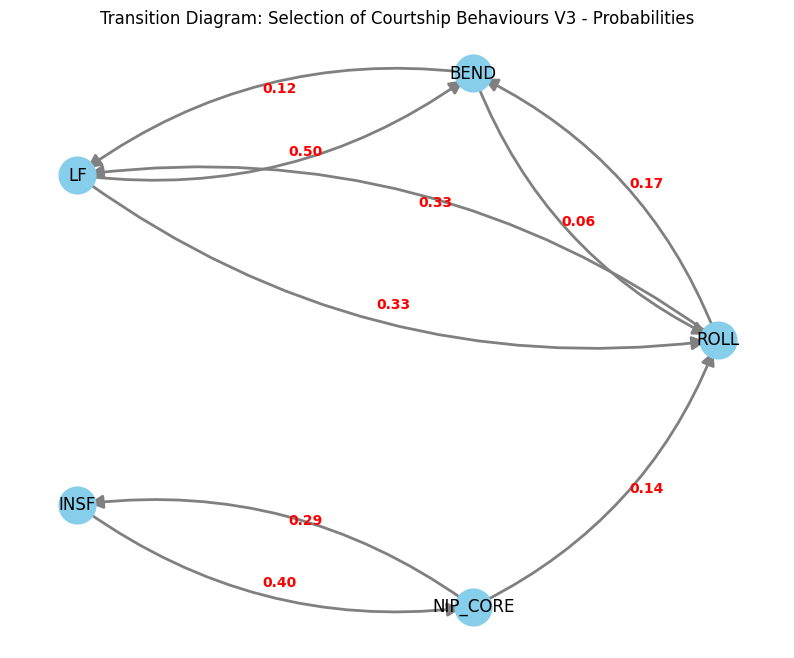

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Supponiamo di avere già la matrice di transizione normalizzata filtrata
# filtered_transition_matrix_normalized

# Creazione del grafo diretto per la matrice filtrata e normalizzata
G_filtered = nx.DiGraph()

# Aggiunta degli archi al grafo con le probabilità come peso
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
pos_filtered = nx.circular_layout(G_filtered)

# Creazione del grafico
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Disegna archi con stile a curve e frecce monodirezionali
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modifica la posizione per disegnare archi curvi
    rad = 0.2 if u != v else 0.0  # rad=0.2 per curve, rad=0 per self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Aggiunta delle etichette ai nodi
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Aggiunta delle etichette agli archi con la probabilità di transizione vicino agli archi
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    # Calcola la posizione media tra i nodi di partenza e di arrivo
    x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
    y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2
    # Applica un piccolo spostamento per evitare sovrapposizioni con le frecce
    offset = 0.1
    x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
    y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Titolo del grafico
plt.title('Transition Diagram: Selection of Courtship Behaviours V3 - Probabilities')
plt.axis('off')  # Disattiva gli assi

#save
#plt.savefig(projectPath_save + '01Courtship_fewV3.png')
#plt.savefig(projectPath_save + '01Courtship_fewV3.pdf')
#plt.savefig(projectPath_save + '01Courtship_fewV3.svg')

# Mostra il grafico
plt.show()

<ipython-input-29-1c4c8bfb4c27>:31: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],


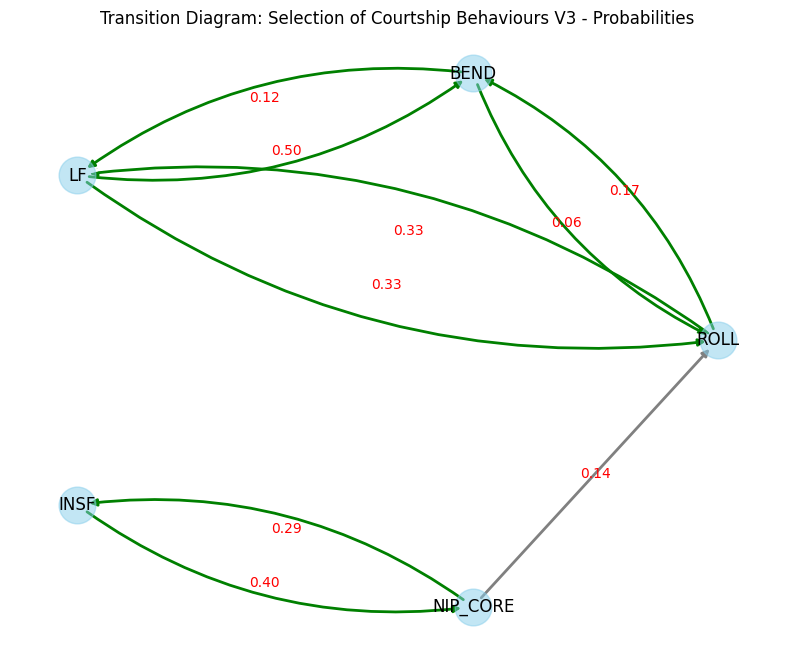

In [ ]:
import networkx as nx

# Creazione del grafo diretto
G_filtered = nx.DiGraph()

# Aggiunta di nodi e archi al grafo
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
# Definizione del layout del grafo
pos = nx.circular_layout(G_filtered)

plt.figure(figsize=(10, 8))

# Disegno dei nodi
nx.draw_networkx_nodes(G_filtered, pos, node_size=700, node_color='skyblue', alpha=0.5)

# Disegno degli archi con stili personalizzati per evitare sovrapposizioni
for u, v, d in G_filtered.edges(data=True):
    if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale (escludendo autoanelli)
        # Disegno dell'arco u -> v
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='green',
                               connectionstyle='arc3,rad=0.2')  # Arco curvo
        # Disegno dell'arco v -> u senza punta di freccia
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],
                               width=2, arrows=False, edge_color='white',    #toglie la linea in mezzo
                               connectionstyle='arc3,rad=-0.2')  # Arco curvo opposto senza punta di freccia
    else:
        # Disegno dell'arco unidirezionale
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='gray')

# Disegno delle etichette (nodi e archi)
nx.draw_networkx_labels(G_filtered, pos, font_size=12, font_color='black', font_family='sans-serif')

# Creazione delle etichette degli archi
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G_filtered.edges(data=True)}

# Personalizzazione delle etichette degli archi
for (u, v), label in edge_labels.items():
    if u == v:  # Controllo per autoanello
        x, y = pos[u]
        plt.text(x + 0.1, y + 0.1, label, color='blue', ha='center', va='center')  # Regolazione posizione etichetta
    else:
        if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale
            # Etichetta per l'arco curvo u -> v
            x, y = (pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2
            dx, dy = pos[v][0] - pos[u][0], pos[v][1] - pos[u][1]
            angle = np.arctan2(dy, dx)
            angle = np.degrees(angle)
            plt.text(x + 0.1 * np.sin(np.radians(angle)), y - 0.1 * np.cos(np.radians(angle)),
                     label, color='red', ha='center', va='center')
        else:
            # Etichetta per l'arco unidirezionale
            plt.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2,
                     label, color='red', ha='center', va='center')

# Titolo del grafico
plt.title('Transition Diagram: Selection of Courtship Behaviours V3 - Probabilities')
plt.axis('off')  # Disattiva gli assi

#save
#plt.savefig(projectPath_save + '02Courtship_fewV3.png')
#plt.savefig(projectPath_save + '02Courtship_fewV3.pdf')
#plt.savefig(projectPath_save + '02Courtship_fewV3.svg')

# Mostra il grafico
plt.show()




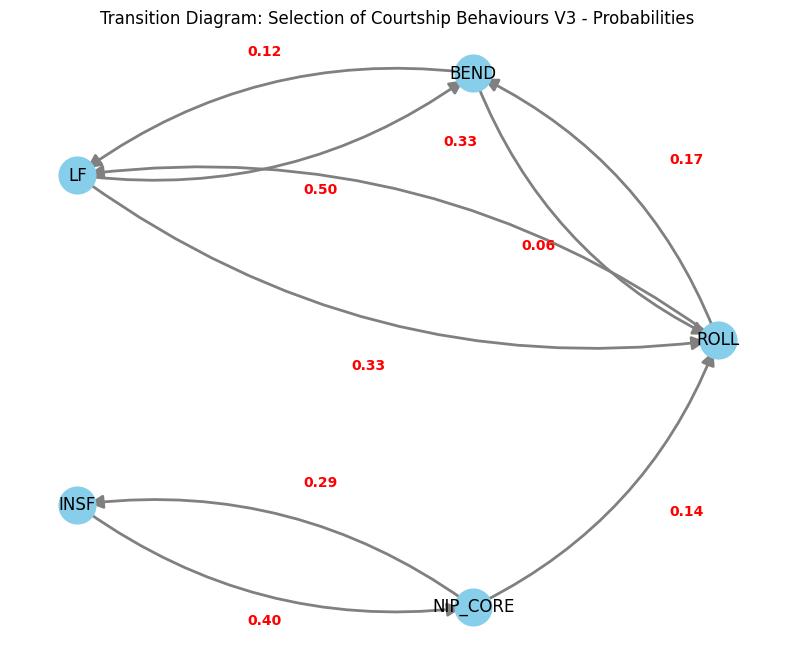

In [ ]:
# Creazione del grafo diretto per la matrice filtrata e normalizzata
G_filtered = nx.DiGraph()

# Aggiunta degli archi al grafo con le probabilità come peso
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
pos_filtered = nx.circular_layout(G_filtered)

# Creazione del grafico
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Disegna archi con stile a curve e frecce monodirezionali
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modifica la posizione per disegnare archi curvi
    rad = 0.2 if u != v else 0.0  # rad=0.2 per curve, rad=0 per self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Aggiunta delle etichette ai nodi
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Aggiunta delle etichette agli archi con la probabilità di transizione vicino agli archi
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    if u == v:
        # Se è un autoanello, posiziona l'etichetta leggermente sopra il nodo
        x_pos = pos_filtered[u][0] + 0.08
        y_pos = pos_filtered[u][1] + 0.08
    else:
        # Calcola la posizione media tra i nodi di partenza e di arrivo
        x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
        y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2
        # Applica un offset maggiore per evitare sovrapposizioni con le frecce
        offset = 0.22
        x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
        y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])

    # Aggiungi l'etichetta al grafico
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Titolo del grafico
plt.title('Transition Diagram: Selection of Courtship Behaviours V3 - Probabilities')
plt.axis('off')  # Disattiva gli assi

#save
#plt.savefig(projectPath_save + '03Courtship_fewV3.png')
#plt.savefig(projectPath_save + '03Courtship_fewV3.pdf')
#plt.savefig(projectPath_save + '03Courtship_fewV3.svg')

# Mostra il grafico
plt.show()


**Nest_mantainance**

In [ ]:
#Removing "['SA', 'LAND'] not in index"
Nest_mantainance = ['NIP_OUT', 'NIP_IN', 'AM', 'MAN', 'NIP_CORE' ]

In [ ]:
# Filtra la matrice di transizione per i comportamenti di interesse
filtered_transition_matrix_normalizedBI = transition_matrix_normalized.loc[Nest_mantainance, Nest_mantainance]

# Visualizza la matrice filtrata
print(filtered_transition_matrix_normalizedBI)


           NIP_OUT    NIP_IN   AM       MAN  NIP_CORE
NIP_OUT   0.000000  0.000000  1.0  0.000000  0.000000
NIP_IN    0.000000  0.000000  0.0  1.000000  0.000000
AM        0.000000  1.000000  0.0  0.000000  0.000000
MAN       0.142857  0.142857  0.0  0.000000  0.428571
NIP_CORE  0.000000  0.000000  0.0  0.285714  0.000000


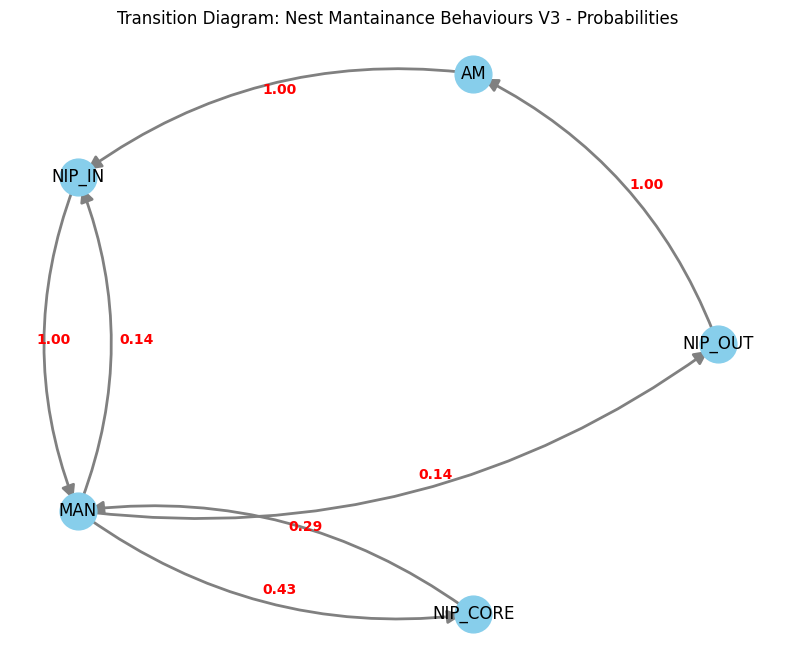

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Supponiamo di avere già la matrice di transizione normalizzata filtrata
# filtered_transition_matrix_normalized

# Creazione del grafo diretto per la matrice filtrata e normalizzata
G_filtered = nx.DiGraph()

# Aggiunta degli archi al grafo con le probabilità come peso
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
pos_filtered = nx.circular_layout(G_filtered)

# Creazione del grafico
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Disegna archi con stile a curve e frecce monodirezionali
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modifica la posizione per disegnare archi curvi
    rad = 0.2 if u != v else 0.0  # rad=0.2 per curve, rad=0 per self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Aggiunta delle etichette ai nodi
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Aggiunta delle etichette agli archi con la probabilità di transizione vicino agli archi
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    # Calcola la posizione media tra i nodi di partenza e di arrivo
    x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
    y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2
    # Applica un piccolo spostamento per evitare sovrapposizioni con le frecce
    offset = 0.1
    x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
    y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Titolo del grafico
plt.title('Transition Diagram: Nest Mantainance Behaviours V3 - Probabilities')
plt.axis('off')  # Disattiva gli assi

#save
#plt.savefig(projectPath_save + '01Nest_mantainanceV3.png')
#plt.savefig(projectPath_save + '01Nest_mantainanceV3.pdf')
#plt.savefig(projectPath_save + '01Nest_mantainanceV3.svg')

# Mostra il grafico
plt.show()


<ipython-input-34-382bff378210>:31: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],


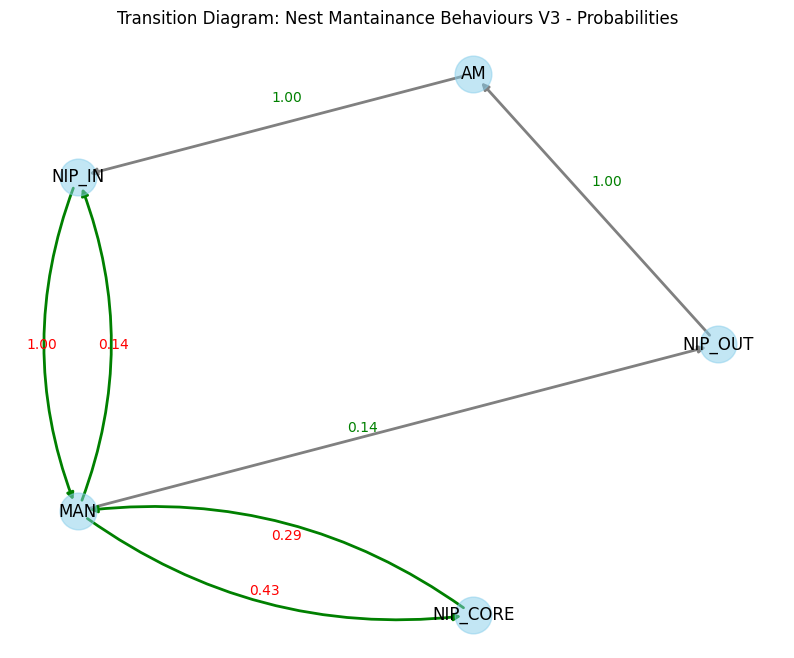

In [ ]:
import networkx as nx

# Creazione del grafo diretto
G_filtered = nx.DiGraph()

# Aggiunta di nodi e archi al grafo
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
# Definizione del layout del grafo
pos = nx.circular_layout(G_filtered)

plt.figure(figsize=(10, 8))

# Disegno dei nodi
nx.draw_networkx_nodes(G_filtered, pos, node_size=700, node_color='skyblue', alpha=0.5)

# Disegno degli archi con stili personalizzati per evitare sovrapposizioni
for u, v, d in G_filtered.edges(data=True):
    if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale (escludendo autoanelli)
        # Disegno dell'arco u -> v
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='green',
                               connectionstyle='arc3,rad=0.2')  # Arco curvo
        # Disegno dell'arco v -> u senza punta di freccia
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],
                               width=2, arrows=False, edge_color='white',    #toglie la linea in mezzo
                               connectionstyle='arc3,rad=-0.2')  # Arco curvo opposto senza punta di freccia
    else:
        # Disegno dell'arco unidirezionale
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='gray')

# Disegno delle etichette (nodi e archi)
nx.draw_networkx_labels(G_filtered, pos, font_size=12, font_color='black', font_family='sans-serif')

# Creazione delle etichette degli archi
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G_filtered.edges(data=True)}

# Personalizzazione delle etichette degli archi
for (u, v), label in edge_labels.items():
    if u == v:  # Controllo per autoanello
        x, y = pos[u]
        plt.text(x + 0.1, y + 0.1, label, color='blue', ha='center', va='center')  # Regolazione posizione etichetta
    else:
        if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale
            # Etichetta per l'arco curvo u -> v
            x, y = (pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2
            dx, dy = pos[v][0] - pos[u][0], pos[v][1] - pos[u][1]
            angle = np.arctan2(dy, dx)
            angle = np.degrees(angle)
            plt.text(x + 0.1 * np.sin(np.radians(angle)), y - 0.1 * np.cos(np.radians(angle)),
                     label, color='red', ha='center', va='center')
        else:
            # Etichetta per l'arco unidirezionale
            plt.text((pos[u][0] + pos[v][0]) / 2 + 0.1 * np.sin(np.radians(angle)), (pos[u][1] + pos[v][1]) / 2 - 0.1 * np.cos(np.radians(angle)),
                     label, color='green', ha='center', va='center')


# Titolo del grafico
plt.title('Transition Diagram: Nest Mantainance Behaviours V3 - Probabilities')
plt.axis('off')  # Disattiva gli assi

#save
#plt.savefig(projectPath_save + '02Nest_mantainanceV3.png')
#plt.savefig(projectPath_save + '02Nest_mantainanceV3.pdf')
#plt.savefig(projectPath_save + '02Nest_mantainanceV3.svg')

# Mostra il grafico
plt.show()




In [ ]:
Nest_mantainanceRID = ['NIP_OUT', 'NIP_IN', 'AM' ]

In [ ]:
# Filtra la matrice di transizione per i comportamenti di interesse
filtered_transition_matrix_normalizedBI = transition_matrix_normalized.loc[Nest_mantainanceRID, Nest_mantainanceRID]

# Visualizza la matrice filtrata
print(filtered_transition_matrix_normalizedBI)


         NIP_OUT  NIP_IN   AM
NIP_OUT      0.0     0.0  1.0
NIP_IN       0.0     0.0  0.0
AM           0.0     1.0  0.0


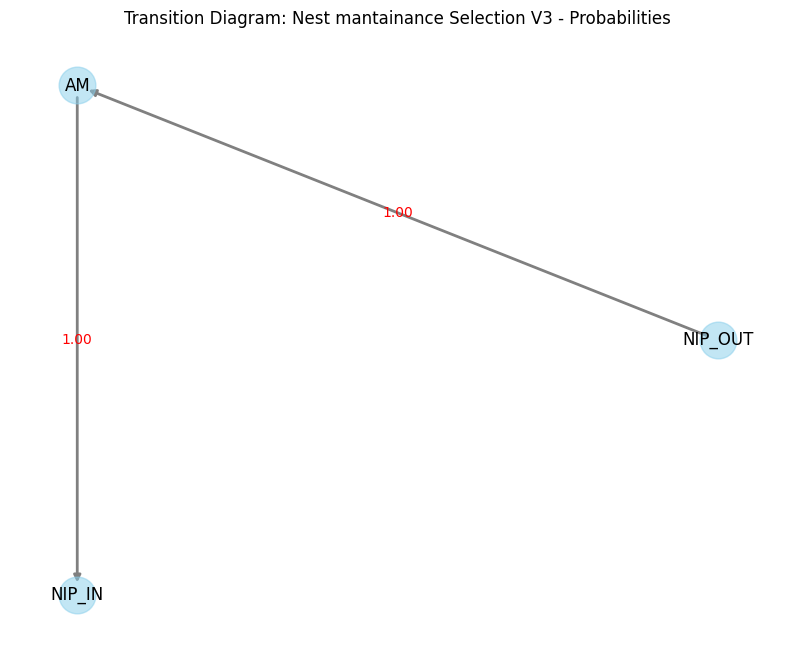

In [ ]:
import networkx as nx

# Creazione del grafo diretto
G_filtered = nx.DiGraph()

# Aggiunta di nodi e archi al grafo
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
# Definizione del layout del grafo
pos = nx.circular_layout(G_filtered)

plt.figure(figsize=(10, 8))

# Disegno dei nodi
nx.draw_networkx_nodes(G_filtered, pos, node_size=700, node_color='skyblue', alpha=0.5)

# Disegno degli archi con stili personalizzati per evitare sovrapposizioni
for u, v, d in G_filtered.edges(data=True):
    if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale (escludendo autoanelli)
        # Disegno dell'arco u -> v
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='green',
                               connectionstyle='arc3,rad=0.2')  # Arco curvo
        # Disegno dell'arco v -> u senza punta di freccia
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],
                               width=2, arrows=False, edge_color='white',    #toglie la linea in mezzo
                               connectionstyle='arc3,rad=-0.2')  # Arco curvo opposto senza punta di freccia
    else:
        # Disegno dell'arco unidirezionale
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='gray')

# Disegno delle etichette (nodi e archi)
nx.draw_networkx_labels(G_filtered, pos, font_size=12, font_color='black', font_family='sans-serif')

# Creazione delle etichette degli archi
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G_filtered.edges(data=True)}

# Personalizzazione delle etichette degli archi
for (u, v), label in edge_labels.items():
    if u == v:  # Controllo per autoanello
        x, y = pos[u]
        plt.text(x + 0.1, y + 0.1, label, color='blue', ha='center', va='center')  # Regolazione posizione etichetta
    else:
        if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale
            # Etichetta per l'arco curvo u -> v
            x, y = (pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2
            dx, dy = pos[v][0] - pos[u][0], pos[v][1] - pos[u][1]
            angle = np.arctan2(dy, dx)
            angle = np.degrees(angle)
            plt.text(x + 0.1 * np.sin(np.radians(angle)), y - 0.1 * np.cos(np.radians(angle)),
                     label, color='red', ha='center', va='center')
        else:
            # Etichetta per l'arco unidirezionale
            plt.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2,
                     label, color='red', ha='center', va='center')

# Titolo e visualizzazione del grafo
plt.title('Transition Diagram: Nest mantainance Selection V3 - Probabilities')
plt.axis('off')  # Disattiva gli assi

#save
#plt.savefig(projectPath_save + '01Nest_mantainanceSelV3.png')
#plt.savefig(projectPath_save + '01Nest_mantainanceSelV3.pdf')
#plt.savefig(projectPath_save + '01Nest_mantainanceSelV3.svg')

# Mostra il grafico
plt.show()


**Egg_care**

In [ ]:
# removing "['INS'] not in index"
Egg_care = ['FAN', 'INSF', 'NIP_CORE']

In [ ]:
# Filtra la matrice di transizione per i comportamenti di interesse
filtered_transition_matrix_normalizedBI = transition_matrix_normalized.loc[Egg_care, Egg_care]

# Visualizza la matrice filtrata
print(filtered_transition_matrix_normalizedBI)


               FAN      INSF  NIP_CORE
FAN       0.000000  0.428571  0.142857
INSF      0.600000  0.000000  0.400000
NIP_CORE  0.142857  0.285714  0.000000


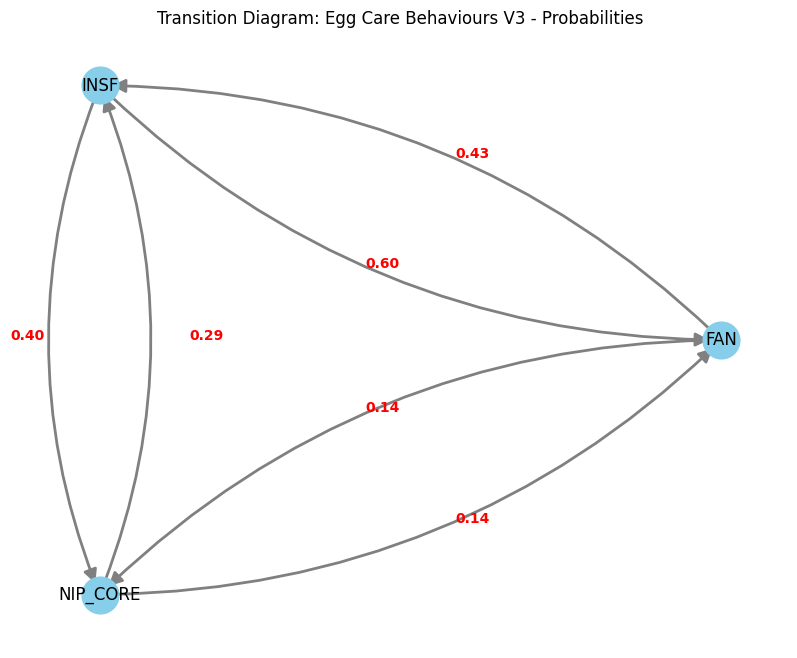

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Creazione del grafo diretto per la matrice filtrata e normalizzata
G_filtered = nx.DiGraph()

# Aggiunta degli archi al grafo con le probabilità come peso
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
pos_filtered = nx.circular_layout(G_filtered)

# Creazione del grafico
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Disegna archi con stile a curve e frecce monodirezionali
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modifica la posizione per disegnare archi curvi
    rad = 0.2 if u != v else 0.0  # rad=0.2 per curve, rad=0 per self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Aggiunta delle etichette ai nodi
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Aggiunta delle etichette agli archi con la probabilità di transizione vicino agli archi
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    # Calcola la posizione media tra i nodi di partenza e di arrivo
    x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
    y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2
    # Applica un piccolo spostamento per evitare sovrapposizioni con le frecce
    offset = 0.125
    x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
    y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Titolo del grafico
plt.title('Transition Diagram: Egg Care Behaviours V3 - Probabilities')
plt.axis('off')  # Disattiva gli assi

#save
#plt.savefig(projectPath_save + '01Egg_careV3.png')
#plt.savefig(projectPath_save + '01Egg_careV3.pdf')
#plt.savefig(projectPath_save + '01Egg_careV3.svg')

# Mostra il grafico
plt.show()


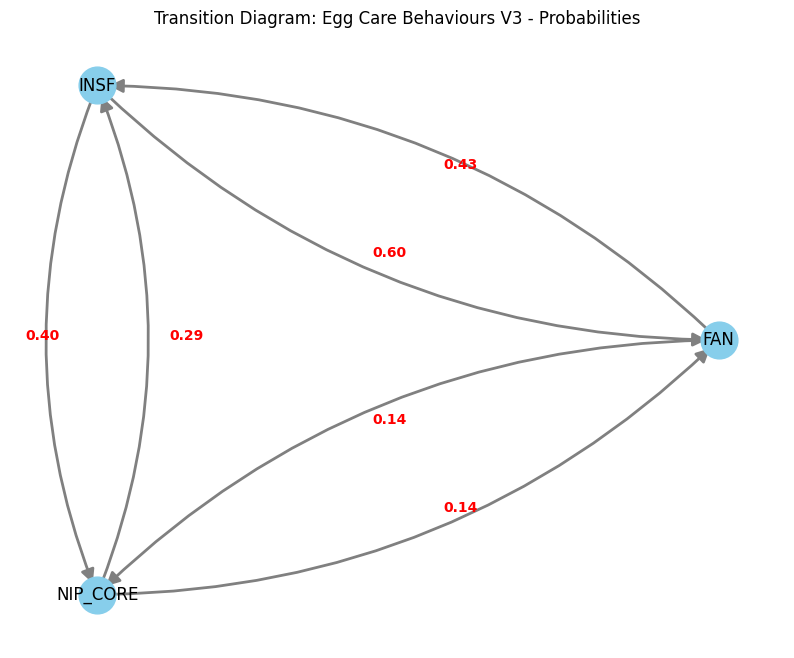

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx


# Creazione del grafo diretto per la matrice filtrata e normalizzata
G_filtered = nx.DiGraph()

# Aggiunta degli archi al grafo con le probabilità come peso
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
pos_filtered = nx.circular_layout(G_filtered)

# Creazione del grafico
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Disegna archi con stile a curve e frecce monodirezionali
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modifica la posizione per disegnare archi curvi
    rad = 0.2 if u != v else 0.0  # rad=0.2 per curve, rad=0 per self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Aggiunta delle etichette ai nodi
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Aggiunta delle etichette agli archi con la probabilità di transizione vicino agli archi
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    if u == v:
        # Se è un autoanello, posiziona l'etichetta leggermente sopra il nodo
        x_pos = pos_filtered[u][0] + 0.1
        y_pos = pos_filtered[u][1] + 0.1
    else:
        # Calcola la posizione media tra i nodi di partenza e di arrivo
        x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
        y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2
        # Applica un piccolo spostamento per evitare sovrapposizioni con le frecce
        offset = 0.1
        x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
        y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])

    # Aggiungi l'etichetta al grafico
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Titolo del grafico
plt.title('Transition Diagram: Egg Care Behaviours V3 - Probabilities')
plt.axis('off')  # Disattiva gli assi

#save
#plt.savefig(projectPath_save + '02Egg_careV3.png')
#plt.savefig(projectPath_save + '02Egg_careV3.pdf')
#plt.savefig(projectPath_save + '02Egg_careV3.svg')

# Mostra il grafico
plt.show()

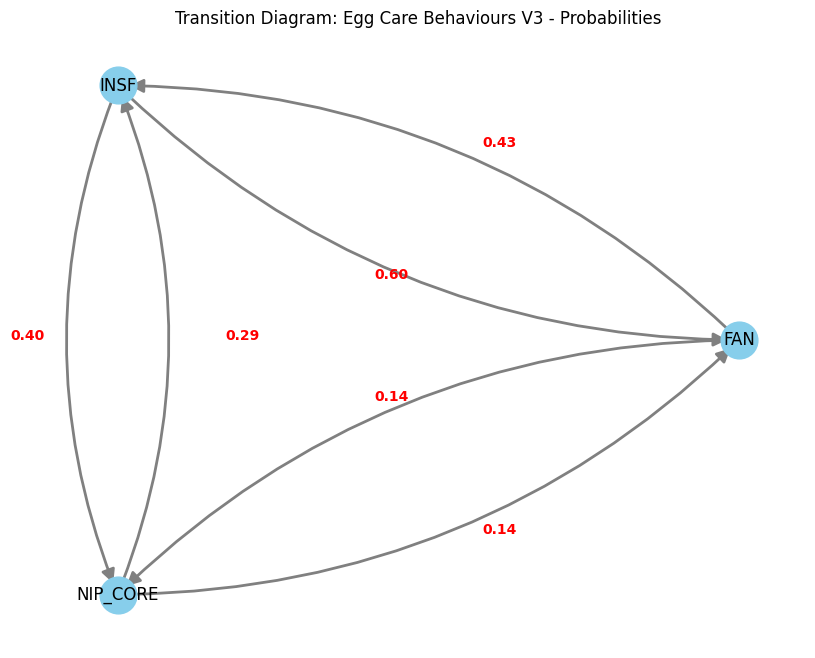

In [ ]:
# Creazione del grafo diretto per la matrice filtrata e normalizzata
G_filtered = nx.DiGraph()

# Aggiunta degli archi al grafo con le probabilità come peso
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
pos_filtered = nx.circular_layout(G_filtered)

# Creazione del grafico
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Disegna archi con stile a curve e frecce monodirezionali
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modifica la posizione per disegnare archi curvi
    rad = 0.2 if u != v else 0.0  # rad=0.2 per curve, rad=0 per self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Aggiunta delle etichette ai nodi
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Aggiunta delle etichette agli archi con la probabilità di transizione vicino agli archi
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    if u == v:
        # Se è un autoanello, posiziona l'etichetta leggermente sopra il nodo
        x_pos = pos_filtered[u][0] + 0.09
        y_pos = pos_filtered[u][1] + 0.09
    else:
        # Calcola la posizione media tra i nodi di partenza e di arrivo
        x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
        y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2
        # Applica un offset maggiore per evitare sovrapposizioni con le frecce
        offset = 0.15
        x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
        y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])

    # Aggiungi l'etichetta al grafico
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Titolo del grafico
plt.title('Transition Diagram: Egg Care Behaviours V3 - Probabilities')
plt.axis('off')  # Disattiva gli assi

#save
#plt.savefig(projectPath_save + '03Egg_careV3.png')
#plt.savefig(projectPath_save + '03Egg_careV3.pdf')
#plt.savefig(projectPath_save + '03Egg_careV3.svg')

# Mostra il grafico
plt.show()


<ipython-input-43-decfabf5c38e>:31: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],


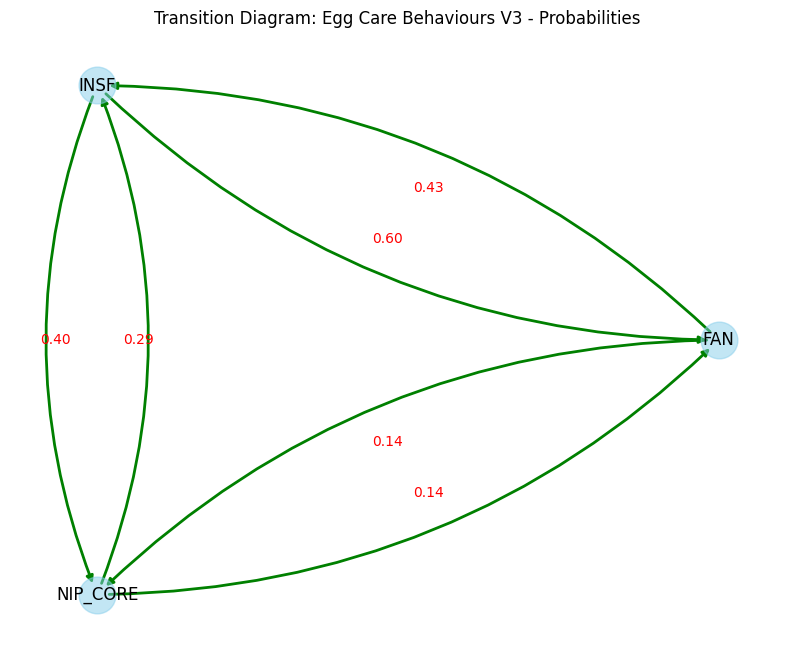

In [ ]:
import networkx as nx

# Creazione del grafo diretto
G_filtered = nx.DiGraph()

# Aggiunta di nodi e archi al grafo
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
# Definizione del layout del grafo
pos = nx.circular_layout(G_filtered)

plt.figure(figsize=(10, 8))

# Disegno dei nodi
nx.draw_networkx_nodes(G_filtered, pos, node_size=700, node_color='skyblue', alpha=0.5)

# Disegno degli archi con stili personalizzati per evitare sovrapposizioni
for u, v, d in G_filtered.edges(data=True):
    if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale (escludendo autoanelli)
        # Disegno dell'arco u -> v
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='green',
                               connectionstyle='arc3,rad=0.2')  # Arco curvo
        # Disegno dell'arco v -> u senza punta di freccia
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],
                               width=2, arrows=False, edge_color='white',    #toglie la linea in mezzo
                               connectionstyle='arc3,rad=-0.2')  # Arco curvo opposto senza punta di freccia
    else:
        # Disegno dell'arco unidirezionale
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='gray')

# Disegno delle etichette (nodi e archi)
nx.draw_networkx_labels(G_filtered, pos, font_size=12, font_color='black', font_family='sans-serif')

# Creazione delle etichette degli archi
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G_filtered.edges(data=True)}

# Personalizzazione delle etichette degli archi
for (u, v), label in edge_labels.items():
    if u == v:  # Controllo per autoanello
        x, y = pos[u]
        plt.text(x + 0.1, y + 0.1, label, color='blue', ha='center', va='center')  # Regolazione posizione etichetta
    else:
        if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale
            # Etichetta per l'arco curvo u -> v
            x, y = (pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2
            dx, dy = pos[v][0] - pos[u][0], pos[v][1] - pos[u][1]
            angle = np.arctan2(dy, dx)
            angle = np.degrees(angle)
            plt.text(x + 0.1 * np.sin(np.radians(angle)), y - 0.1 * np.cos(np.radians(angle)),
                     label, color='red', ha='center', va='center')
        else:
            # Etichetta per l'arco unidirezionale
            plt.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2,
                     label, color='red', ha='center', va='center')

# Titolo e visualizzazione del grafo

plt.title('Transition Diagram: Egg Care Behaviours V3 - Probabilities')
plt.axis('off')  # Disattiva gli assi

#save
#plt.savefig(projectPath_save + '04Egg_careV3.png')
#plt.savefig(projectPath_save + '04Egg_careV3.pdf')
#plt.savefig(projectPath_save + '04Egg_careV3.svg')

# Mostra il grafico
plt.show()



**Agonism behaviours not interesting graphic results for this video**

In [ ]:
Agonism = ['CHASE_FLEE', 'BN']

In [ ]:
# Filtra la matrice di transizione per i comportamenti di interesse
filtered_transition_matrix_normalizedBI = transition_matrix_normalized.loc[Agonism, Agonism]

# Visualizza la matrice filtrata
print(filtered_transition_matrix_normalizedBI)


            CHASE_FLEE   BN
CHASE_FLEE         0.5  0.5
BN                 0.0  0.0


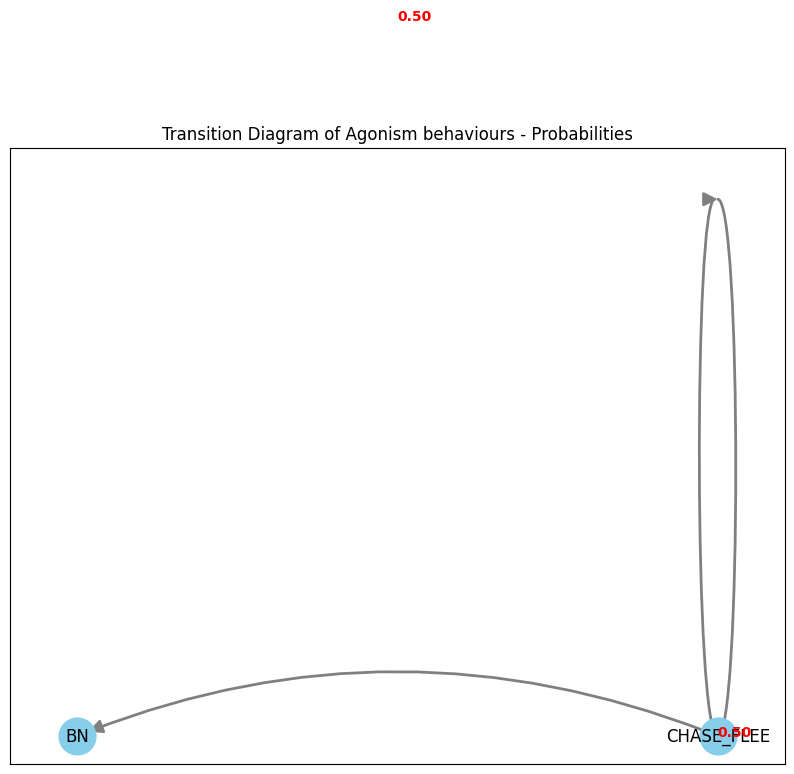

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Supponiamo di avere già la matrice di transizione normalizzata filtrata
# filtered_transition_matrix_normalized

# Creazione del grafo diretto per la matrice filtrata e normalizzata
G_filtered = nx.DiGraph()

# Aggiunta degli archi al grafo con le probabilità come peso
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
pos_filtered = nx.circular_layout(G_filtered)

# Creazione del grafico
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Disegna archi con stile a curve e frecce monodirezionali
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modifica la posizione per disegnare archi curvi
    rad = 0.2 if u != v else 0.0  # rad=0.2 per curve, rad=0 per self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Aggiunta delle etichette ai nodi
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Aggiunta delle etichette agli archi con la probabilità di transizione vicino agli archi
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    # Calcola la posizione media tra i nodi di partenza e di arrivo
    x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
    y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2
    # Applica un piccolo spostamento per evitare sovrapposizioni con le frecce
    offset = 0.1
    x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
    y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Titolo del grafico
plt.title('Transition Diagram of Agonism behaviours - Probabilities')

# Mostra il grafico
plt.show()
plt.savefig(projectPath + 'Agonism.png')

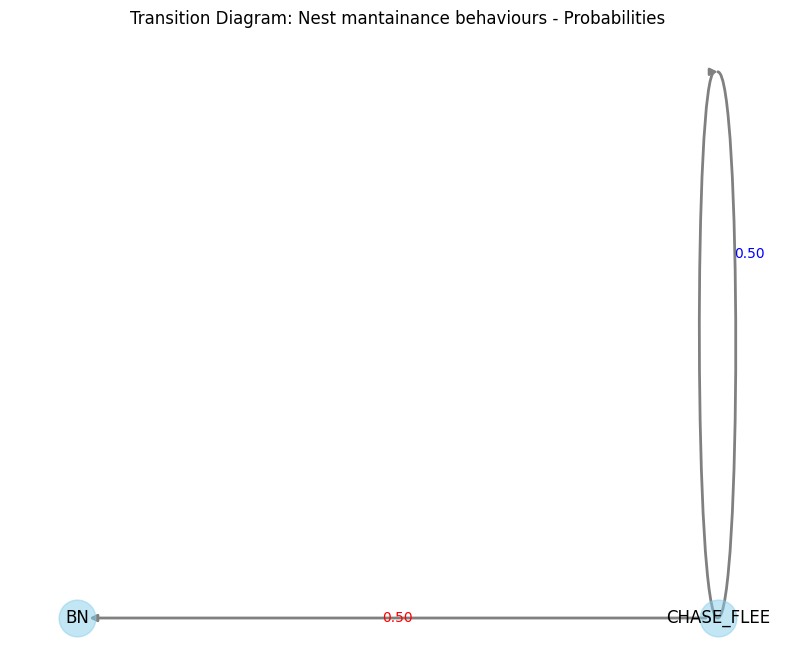

In [ ]:
import networkx as nx

# Creazione del grafo diretto
G_filtered = nx.DiGraph()

# Aggiunta di nodi e archi al grafo
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
# Definizione del layout del grafo
pos = nx.circular_layout(G_filtered)

plt.figure(figsize=(10, 8))

# Disegno dei nodi
nx.draw_networkx_nodes(G_filtered, pos, node_size=700, node_color='skyblue', alpha=0.5)

# Disegno degli archi con stili personalizzati per evitare sovrapposizioni
for u, v, d in G_filtered.edges(data=True):
    if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale (escludendo autoanelli)
        # Disegno dell'arco u -> v
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='green',
                               connectionstyle='arc3,rad=0.2')  # Arco curvo
        # Disegno dell'arco v -> u senza punta di freccia
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],
                               width=2, arrows=False, edge_color='white',    #toglie la linea in mezzo
                               connectionstyle='arc3,rad=-0.2')  # Arco curvo opposto senza punta di freccia
    else:
        # Disegno dell'arco unidirezionale
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='gray')

# Disegno delle etichette (nodi e archi)
nx.draw_networkx_labels(G_filtered, pos, font_size=12, font_color='black', font_family='sans-serif')

# Creazione delle etichette degli archi
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G_filtered.edges(data=True)}

# Personalizzazione delle etichette degli archi
for (u, v), label in edge_labels.items():
    if u == v:  # Controllo per autoanello
        x, y = pos[u]
        plt.text(x + 0.1, y + 0.1, label, color='blue', ha='center', va='center')  # Regolazione posizione etichetta
    else:
        if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale
            # Etichetta per l'arco curvo u -> v
            x, y = (pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2
            dx, dy = pos[v][0] - pos[u][0], pos[v][1] - pos[u][1]
            angle = np.arctan2(dy, dx)
            angle = np.degrees(angle)
            plt.text(x + 0.1 * np.sin(np.radians(angle)), y - 0.1 * np.cos(np.radians(angle)),
                     label, color='red', ha='center', va='center')
        else:
            # Etichetta per l'arco unidirezionale
            plt.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2,
                     label, color='red', ha='center', va='center')

# Titolo e visualizzazione del grafo
plt.title('Transition Diagram: Nest mantainance behaviours - Probabilities')
plt.axis('off')  # Disattiva gli assi

plt.savefig(projectPath + 'courtship_few_diagram.png')
#plt.savefig(projectPath + 'courtship_few_diagram.pdf')
plt.savefig(projectPath + 'courtship_few_diagram.svg')
plt.show()  # Mostra il grafo


